In [49]:
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm

# read in the shapefile
parcels = gpd.read_file("/Users/alexdevoid/Documents/urban3_analysis/data/Buncombe_County_Parcels/Buncombe_County_Parcels.zip") 
# read in the two CSV files
appraisal_tax_history = pd.read_csv("/Users/alexdevoid/Documents/urban3_analysis/data/Appraisal_Tax_History2022/Real_Estate_Appraisal_Tax_History_2022.csv")

# unpaid_bills = pd.read_csv("/Users/alexdevoid/Documents/urban3_analysis/data/Unpaid_Property_Bills2022/Unpaid_Property_Bills_from_2022.csv")





# left merge the shapefile with the two CSV files on the "PIN" or "pin" column

appraisal_tax_history.head(5)

/var/folders/hy/304lry6j4sbbkk4_rs_vfdw80000gn/T/ipykernel_18900/3158397211.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  appraisal_tax_history = pd.read_csv("/Users/alexdevoid/Documents/urban3_analysis/data/Appraisal_Tax_History2022/Real_Estate_Appraisal_Tax_History_2022.csv")


,PIN,TaxYear,PinOwner,Acres,LandVal,BldgVal,ImprVal,ExemVal,DfrdVal,Exemption,OBJECTID
0,060502683700000,2007.0,82007411.0,1.5,110900.0,0.0,0.0,0.0,0.0,0,1
1,060502683700000,2008.0,82007411.0,1.5,110900.0,0.0,0.0,0.0,0.0,0,2
2,060502683700000,2009.0,82007411.0,1.5,110900.0,0.0,0.0,0.0,0.0,0,3
3,060502683700000,2010.0,82007411.0,1.5,110900.0,0.0,0.0,0.0,0.0,0,4
4,060502683700000,2011.0,82007411.0,1.5,110900.0,0.0,0.0,0.0,0.0,0,5


In [50]:
# Single family
parcels =parcels.loc[parcels['Class'].isin(['100','101','120','121','170'])]
print(len(parcels))
parcels_len=len(parcels)

91179


In [51]:
# print(parcels.dtypes)
import numpy as np
appraisal_tax_history = appraisal_tax_history.loc[appraisal_tax_history['TaxYear'] >= 2020]

appraisal_tax_history = appraisal_tax_history[appraisal_tax_history['PIN'].isin(parcels['PIN'])] 



appraisal_tax_history['TotalVal'] = appraisal_tax_history['LandVal']+appraisal_tax_history['BldgVal']


appraisal_tax_history = appraisal_tax_history.sort_values(by=['PIN','TaxYear'])
appraisal_tax_history['land_value_pct_change'] = appraisal_tax_history.groupby('PIN')['LandVal'].pct_change(periods=1)
appraisal_tax_history['building_value_pct_change'] = appraisal_tax_history.groupby('PIN')['BldgVal'].pct_change(periods=1) 
appraisal_tax_history['total_value_pct_change'] = appraisal_tax_history.groupby('PIN')['TotalVal'].pct_change(periods=1) 
print(appraisal_tax_history['total_value_pct_change'][57])



# appraisal_tax_history.head(50)


# Investigate 

nan


In [52]:
appraisal_tax_history = appraisal_tax_history.loc[appraisal_tax_history['TaxYear'] == 2021.0]
print(len(appraisal_tax_history))

83280


In [53]:






# User inner join here to only anlayse properties that I have a rate change for
# this is to avoid possible parcels that have been created so i don't paabel them as having not 
#paid a bill that without having been around for the rate increase
merged_data = parcels.merge(appraisal_tax_history, how='inner', left_on='PIN', right_on='PIN')
print(len(merged_data))

# merged_data_length_with_percent_change
merged_data_length_with_percent_change = len(merged_data)
merged_data

83280


,PIN,Owner,NmpType,TaxYear_x,CondoUnit,CondoBuild,DeedBook,DeedPage,PlatBook,PlatPage,SubName,SubLot,SubBlock,SubSect,UpdateDate,HouseNumbe,NumberSuff,StreetName,StreetType,Township,Acreage,AccountNum,DeedDate,Stamps,Instrument,Reason,County,City,FireDistri,SchoolDist,CareOf,Address,CityName,State,Zipcode,Class,Improved,Exempt,Priced,TotalMarke,AppraisedV,TaxValue,LandUse,Neighborho,LandValue,BuildingVa,AppraisalA,PropCard,StreetPref,StreetPost,SalePrice,objectid,ESRI_OID,geometry,TaxYear_y,PinOwner,Acres,LandVal,BldgVal,ImprVal,ExemVal,DfrdVal,Exemption,OBJECTID,TotalVal,land_value_pct_change,building_value_pct_change,total_value_pct_change
0,060503100000000,STONE ROBERT K;STONE REBECCA,NaN,24,None,None,1340,0496,0000,0000,None,None,None,None,20230117,23,None,BUTTERROW COVE,RD,20,1.690000,69436531;69436532,19710706,1.0,DEE,None,BUN,None,FFA,None,None,23 BUTTERROW COVE RD,FAIRVIEW,NC,28730,100,Y,None,None,296000,296000,296000,None,TSTD,61100,233900,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,1000,121558,74153,"POLYGON ((-82.36073 35.49799, -82.36057 35.497...",2021.0,69436531.0,1.69,61100.0,233900.0,1000.0,0.0,0.0,0,59,295000.0,0.000000,0.096064,0.074681
1,060503128800000,MOLLY HAMILTON TRUST,NaN,24,None,None,6282,559,0104,0149,SUGAR HOLLOW ORCHARDS,3,None,None,20230117,5,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82925343,20221212,0.0,WDT,None,BUN,None,FFA,None,None,5 SUGAR HOLLOW ORCHARD DR,FAIRVIEW,NC,28730,100,Y,None,None,474200,474200,474200,None,SUOA,120000,354200,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,76153,74154,"POLYGON ((-82.35906 35.49882, -82.35946 35.498...",2021.0,82248521.0,1.50,120000.0,354200.0,0.0,0.0,0.0,0,75,474200.0,0.000000,0.095238,0.069463
2,060503165400000,SHUMAN TODD A;SHUMAN DEBRA A,NaN,24,None,None,5251,1472,0104,0149,SUGAR HOLLOW ORCHARDS,2,None,None,20230117,12,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82735631;82735632,20141014,1060.0,WDT,None,BUN,None,FFA,None,None,28 FAIR OAKS DR,SAINT LOUIS,MO,63124,100,Y,None,None,556800,556800,556800,None,SUOA,120000,436800,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15563,74155,"POLYGON ((-82.35926 35.49957, -82.36010 35.499...",2021.0,82735631.0,1.50,120000.0,436800.0,0.0,0.0,0.0,0,91,556800.0,0.000000,0.077454,0.059764
3,060503471800000,GAGE GASTON H;GAGE BETH D,NaN,24,None,None,5439,1415,0104,0149,SUGAR HOLLOW ORCHARDS,1,None,None,20230117,40,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82834536;82834537,20160624,1670.0,WDT,None,BUN,None,FFA,None,None,1903 PINEWOOD CIR,CHARLOTTE,NC,28211,100,Y,None,None,1024000,1024000,1024000,None,SUOA,120000,904000,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,94341,74157,"POLYGON ((-82.35841 35.49986, -82.35886 35.499...",2021.0,82834536.0,1.50,120000.0,904000.0,0.0,0.0,0.0,0,122,1024000.0,0.000000,0.083803,0.073263
4,060503523400000,WILLIAMS THOMAS C;WILLIAMS LAURA R,NaN,24,None,None,4270,0091,0104,0149,SUGAR HOLLOW ORCHARDS,4,None,None,20230117,88,None,BUTTERROW COVE,RD,20,1.500000,82137091;82137092,20060817,0.0,WDT,None,BUN,None,FFA,None,None,88 BUTTERROW COVE RD,FAIRVIEW,NC,28730,100,Y,None,None,827700,827700,827700,None,SUOA,120000,707700,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15556,74158,"POLYGON ((-82.35806 35.49846, -82.35814 35.498...",2021.0,82137091.0,1.50,120000.0,707700.0,0.0,0.0,0.0,0,138,827700.0,0.000000,0.091624,0.077314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83275,979549823500000,CHANDLER WANDA J,NaN,24,None,None,1822,0164,0000,0000,None,None,None,None,20230117,25,None,HOWARD STINES,LN,24,2.330000,80863221,19941026,0.0,WDS,None,BUN,None,FBA,None,WANDA J KOCH,15 HOWARD STINES LN,BARNARDSVILLE,NC,28709,170,Y,None,None,65300,65300,65300,None,R8XX,48900,16400,2,http://prc-bu

In [54]:
print(merged_data.columns)

merged_data.head(15)


Index(['PIN', 'Owner', 'NmpType', 'TaxYear_x', 'CondoUnit', 'CondoBuild',
       'DeedBook', 'DeedPage', 'PlatBook', 'PlatPage', 'SubName', 'SubLot',
       'SubBlock', 'SubSect', 'UpdateDate', 'HouseNumbe', 'NumberSuff',
       'StreetName', 'StreetType', 'Township', 'Acreage', 'AccountNum',
       'DeedDate', 'Stamps', 'Instrument', 'Reason', 'County', 'City',
       'FireDistri', 'SchoolDist', 'CareOf', 'Address', 'CityName', 'State',
       'Zipcode', 'Class', 'Improved', 'Exempt', 'Priced', 'TotalMarke',
       'AppraisedV', 'TaxValue', 'LandUse', 'Neighborho', 'LandValue',
       'BuildingVa', 'AppraisalA', 'PropCard', 'StreetPref', 'StreetPost',
       'SalePrice', 'objectid', 'ESRI_OID', 'geometry', 'TaxYear_y',
       'PinOwner', 'Acres', 'LandVal', 'BldgVal', 'ImprVal', 'ExemVal',
       'DfrdVal', 'Exemption', 'OBJECTID', 'TotalVal', 'land_value_pct_change',
       'building_value_pct_change', 'total_value_pct_change'],
      dtype='object')


,PIN,Owner,NmpType,TaxYear_x,CondoUnit,CondoBuild,DeedBook,DeedPage,PlatBook,PlatPage,SubName,SubLot,SubBlock,SubSect,UpdateDate,HouseNumbe,NumberSuff,StreetName,StreetType,Township,Acreage,AccountNum,DeedDate,Stamps,Instrument,Reason,County,City,FireDistri,SchoolDist,CareOf,Address,CityName,State,Zipcode,Class,Improved,Exempt,Priced,TotalMarke,AppraisedV,TaxValue,LandUse,Neighborho,LandValue,BuildingVa,AppraisalA,PropCard,StreetPref,StreetPost,SalePrice,objectid,ESRI_OID,geometry,TaxYear_y,PinOwner,Acres,LandVal,BldgVal,ImprVal,ExemVal,DfrdVal,Exemption,OBJECTID,TotalVal,land_value_pct_change,building_value_pct_change,total_value_pct_change
0,060503100000000,STONE ROBERT K;STONE REBECCA,NaN,24,None,None,1340,0496,0000,0000,None,None,None,None,20230117,23,None,BUTTERROW COVE,RD,20,1.69,69436531;69436532,19710706,1.0,DEE,None,BUN,None,FFA,None,None,23 BUTTERROW COVE RD,FAIRVIEW,NC,28730,100,Y,None,None,296000,296000,296000,None,TSTD,61100,233900,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,1000,121558,74153,"POLYGON ((-82.36073 35.49799, -82.36057 35.497...",2021.0,69436531.0,1.69,61100.0,233900.0,1000.0,0.0,0.0,0,59,295000.0,0.000000,0.096064,0.074681
1,060503128800000,MOLLY HAMILTON TRUST,NaN,24,None,None,6282,559,0104,0149,SUGAR HOLLOW ORCHARDS,3,None,None,20230117,5,None,SUGAR HOLLOW ORCHARD,DR,20,1.50,82925343,20221212,0.0,WDT,None,BUN,None,FFA,None,None,5 SUGAR HOLLOW ORCHARD DR,FAIRVIEW,NC,28730,100,Y,None,None,474200,474200,474200,None,SUOA,120000,354200,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,76153,74154,"POLYGON ((-82.35906 35.49882, -82.35946 35.498...",2021.0,82248521.0,1.50,120000.0,354200.0,0.0,0.0,0.0,0,75,474200.0,0.000000,0.095238,0.069463
2,060503165400000,SHUMAN TODD A;SHUMAN DEBRA A,NaN,24,None,None,5251,1472,0104,0149,SUGAR HOLLOW ORCHARDS,2,None,None,20230117,12,None,SUGAR HOLLOW ORCHARD,DR,20,1.50,82735631;82735632,20141014,1060.0,WDT,None,BUN,None,FFA,None,None,28 FAIR OAKS DR,SAINT LOUIS,MO,63124,100,Y,None,None,556800,556800,556800,None,SUOA,120000,436800,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15563,74155,"POLYGON ((-82.35926 35.49957, -82.36010 35.499...",2021.0,82735631.0,1.50,120000.0,436800.0,0.0,0.0,0.0,0,91,556800.0,0.000000,0.077454,0.059764
3,060503471800000,GAGE GASTON H;GAGE BETH D,NaN,24,None,None,5439,1415,0104,0149,SUGAR HOLLOW ORCHARDS,1,None,None,20230117,40,None,SUGAR HOLLOW ORCHARD,DR,20,1.50,82834536;82834537,20160624,1670.0,WDT,None,BUN,None,FFA,None,None,1903 PINEWOOD CIR,CHARLOTTE,NC,28211,100,Y,None,None,1024000,1024000,1024000,None,SUOA,120000,904000,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,94341,74157,"POLYGON ((-82.35841 35.49986, -82.35886 35.499...",2021.0,82834536.0,1.50,120000.0,904000.0,0.0,0.0,0.0,0,122,1024000.0,0.000000,0.083803,0.073263
4,060503523400000,WILLIAMS THOMAS C;WILLIAMS LAURA R,NaN,24,None,None,4270,0091,0104,0149,SUGAR HOLLOW ORCHARDS,4,None,None,20230117,88,None,BUTTERROW COVE,RD,20,1.50,82137091;82137092,20060817,0.0,WDT,None,BUN,None,FFA,None,None,88 BUTTERROW COVE RD,FAIRVIEW,NC,28730,100,Y,None,None,827700,827700,827700,None,SUOA,120000,707700,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15556,74158,"POLYGON ((-82.35806 35.49846, -82.35814 35.498...",2021.0,82137091.0,1.50,120000.0,707700.0,0.0,0.0,0.0,0,138,827700.0,0.000000,0.091624,0.077314
5,060503708200000,BOSOMWORTH PHYLLIS NIXON;BOSOMWORTH DAVID PALL...,NaN,24,None,None,4270,0093,0104,0149,SUGAR HOLLOW ORCHARDS,5,None,None,20230117,86,None,BUTTERROW COVE,RD,20,1.50,82137101;82137102,20060817,0.0,WDT,None,BUN,None,FFA,None,None,301 BREEZEWOOD DR,ELIZABETH CTY,NC,27909,100,Y,None,None,402900,402900,402900,None,SUOA,120000,282900,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,4277,74159,"POLYGON ((-82.35763 35.49747, -82.35773 35.497...",2021.0,82137101.0,1.50,120000.0,282900.0,0.0,0.0,0.0,0,154,402900.0,0.000000,0.071997,0.049492
6,060507058600000,OUTLAND PEAK LLC,NaN,24,Non

In [55]:
pd.options.display.max_columns = None
import numpy as np
unpaid_bills = pd.read_csv("/Users/alexdevoid/Documents/urban3_analysis/data/Unpaid_Property_Bills2022/Unpaid_Property_Bills_from_2022.csv")
unpaid_bills['unpaid_bill']=True
print(len(merged_data))
print(len(unpaid_bills))

# merged_data = merged_data.merge(unpaid_bills, how='left', left_on=['ADDRESS', 'CITYNAME', 'ZIPCODE'], right_on=['address_line1', 'city', 'postal_code'])

# # drop any duplicate columns
# merged_data = merged_data.drop(columns=['pin_x', 'pin_y'])

# # save the merged data to a new shapefile
# merged_data.to_file("merged_parcels.shp")

unpaid_bills['pin'] = unpaid_bills['pin'].str.replace("-", "")
# unpaid_bills['pin'] = pd.to_numeric(unpaid_bills['pin'], errors='coerce')
unpaid_bills['postal_code'] = unpaid_bills['postal_code'].astype(str)
unpaid_bills['postal_code'] = unpaid_bills['postal_code'].astype(object)
print(merged_data[["Address", "CityName", "Zipcode"]].dtypes)
print(merged_data['PIN'].dtype)
print(unpaid_bills['pin'].dtype)
print(unpaid_bills[["address_line1", "city", "postal_code"]].dtypes)

unpaid_bills.head(10)

# Remove leading and trailing white spaces from the "address_line1", "city", "postal_code", "ADDRESS", "CITYNAME", and "ZIPCODE" columns
unpaid_bills['pin'] = unpaid_bills['pin'].str.strip()
merged_data['PIN'] = merged_data['PIN'].str.strip()

unpaid_bills['address_line1']=unpaid_bills['address_line1']+unpaid_bills['address_line2']
unpaid_bills['address_line1'] = unpaid_bills['address_line1'].str.strip()
unpaid_bills['city'] = unpaid_bills['city'].str.strip()
unpaid_bills['postal_code'] = unpaid_bills['postal_code'].str.strip()
merged_data['Address'] = merged_data['Address'].str.strip()
merged_data['CityName'] = merged_data['CityName'].str.strip()
merged_data['Zipcode'] = merged_data['Zipcode'].str.strip()

# Convert the "address_line1", "city", "postal_code", "ADDRESS", "CITYNAME", and "ZIPCODE" columns to lowercase
unpaid_bills['address_line1'] = unpaid_bills['address_line1'].str.lower()
unpaid_bills['city'] = unpaid_bills['city'].str.lower()
unpaid_bills['postal_code'] = unpaid_bills['postal_code'].str.lower()
merged_data['Address'] = merged_data['Address'].str.lower()
merged_data['CityName'] = merged_data['CityName'].str.lower()
merged_data['Zipcode'] = merged_data['Zipcode'].str.lower()


unpaid_bills

# First, fill missing "pin" values in unpaid_bills with None
# unpaid_bills['pin'] = unpaid_bills['pin'].fillna(value=np.nan)

# Do the left merge on "PIN" and "pin"
#Primary merge on "PIN" and "pin" columns
unpaid_bills = unpaid_bills.rename(columns={'pin': 'PIN'})


unpaid_bills['PIN'] = unpaid_bills['PIN'].fillna(value='')
merged_data['PIN'] = merged_data['PIN'].fillna(value='')

unpaid_bills['PIN'] = unpaid_bills['PIN'].astype(str)

merged_data['PIN'] = merged_data['PIN'].astype(str)
print(len(merged_data))
print('unpaid_bills: ',len(merged_data))
print(merged_data['PIN'].dtype)
print( unpaid_bills['PIN'].dtype)

# Sort the dataframes on the join column "PIN"
merged_data.sort_values("PIN", inplace=True)
unpaid_bills.sort_values("PIN", inplace=True)

# Use the isin() function to filter the larger dataframe
# merged_data = merged_data[merged_data['PIN'].isin(unpaid_bills['PIN'])]
# print(len(merged_data))
# # Merge the filtered dataframes
# merged_data = pd.merge(merged_data, unpaid_bills, on='PIN', how='left',indicator=True)
# print(len(merged_data))

# Create index on PIN column

# merged_data_no_pin = merged_data[~merged_data['PIN'].isin(unpaid_bills['PIN'])]
# Merge the dataframes using index
merged_data = merged_data.join(unpaid_bills, how='left',
                               lsuffix='', rsuffix='_y', sort=False)
print(len(merged_data))

print(len(merged_data))
#Secondary merge on "Address", "CityName", "Zipcode" and "address_line1", "city", "postal_code"
# merged_data_no_pin = merged_data_no_pin.merge(unpaid_bills, how='left', 
#                                 left_on=['Address', 'CityName'], 
#                                 right_on=['address_line1', 'city'])

# print(len(merged_data_no_pin))
# merged_data = pd.concat([merged_data_no_pin,merged_data]) 
print(len(merged_data))
merged_data['unpaid_bill']=merged_data['unpaid_bill'].fillna(value=False)
merged_data

83280
21369


/var/folders/hy/304lry6j4sbbkk4_rs_vfdw80000gn/T/ipykernel_18900/1166118298.py:3: DtypeWarning: Columns (12,21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  unpaid_bills = pd.read_csv("/Users/alexdevoid/Documents/urban3_analysis/data/Unpaid_Property_Bills2022/Unpaid_Property_Bills_from_2022.csv")


Address     object
CityName    object
Zipcode     object
dtype: object
object
object
address_line1    object
city             object
postal_code      object
dtype: object
83280
unpaid_bills:  83280
object
object
83280
83280
83280


,PIN,Owner,NmpType,TaxYear_x,CondoUnit,CondoBuild,DeedBook,DeedPage,PlatBook,PlatPage,SubName,SubLot,SubBlock,SubSect,UpdateDate,HouseNumbe,NumberSuff,StreetName,StreetType,Township,Acreage,AccountNum,DeedDate,Stamps,Instrument,Reason,County,City,FireDistri,SchoolDist,CareOf,Address,CityName,State,Zipcode,Class,Improved,Exempt,Priced,TotalMarke,AppraisedV,TaxValue,LandUse,Neighborho,LandValue,BuildingVa,AppraisalA,PropCard,StreetPref,StreetPost,SalePrice,objectid,ESRI_OID,geometry,TaxYear_y,PinOwner,Acres,LandVal,BldgVal,ImprVal,ExemVal,DfrdVal,Exemption,OBJECTID,TotalVal,land_value_pct_change,building_value_pct_change,total_value_pct_change,acres,active_flag,ad_cost_due,address_line1,address_line2,bill,city,city_code,cost_due,deed_book,deed_date,deed_instrument,deed_page,deferred_value,exempt_value,fees_due,fire_code,house_num,house_suf,interest_due,late_due,levy_due,levy_year,loan_num,mortgage_co,original_bill_amount,owner1_first_name,owner1_last_name,owner1_suffix_name,owner1_third_name,owner2_first_name,owner2_last_name,owner2_suffix_name,owner2_third_name,personal_value,PIN_y,plat_book,plat_page,postal_code,postal_code_ext,real_value,school_code,state,street_direction,street_name,street_type,sub_lot,subdivision,tax_due,total_due,total_value,township,OBJECTID_y,unpaid_bill
0,060503100000000,STONE ROBERT K;STONE REBECCA,NaN,24,None,None,1340,0496,0000,0000,None,None,None,None,20230117,23,None,BUTTERROW COVE,RD,20,1.690000,69436531;69436532,19710706,1.0,DEE,None,BUN,None,FFA,None,None,23 butterrow cove rd,fairview,NC,28730,100,Y,None,None,296000,296000,296000,None,TSTD,61100,233900,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,1000,121558,74153,"POLYGON ((-82.36073 35.49799, -82.36057 35.497...",2021.0,69436531.0,1.69,61100.0,233900.0,1000.0,0.0,0.0,0,59,295000.0,0.000000,0.096064,0.074681,NaN,NaN,0.0,NaN,NaN,0000762296-2022-2022-0000-00,candler,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,FEC,0.0,0,0.0,26.34,289.74,2022.0,NaN,NaN,289.74,JOSEPH,CHESTER,NaN,NaN,NaN,NaN,NaN,NaN,44419.0,,NaN,NaN,28715.0,8184.0,0.0,NaN,NC,NaN,NaN,NaN,NaN,NaN,263.40,289.74,44419.0,NaN,15036.0,True
1,060503128800000,MOLLY HAMILTON TRUST,NaN,24,None,None,6282,559,0104,0149,SUGAR HOLLOW ORCHARDS,3,None,None,20230117,5,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82925343,20221212,0.0,WDT,None,BUN,None,FFA,None,None,5 sugar hollow orchard dr,fairview,NC,28730,100,Y,None,None,474200,474200,474200,None,SUOA,120000,354200,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,76153,74154,"POLYGON ((-82.35906 35.49882, -82.35946 35.498...",2021.0,82248521.0,1.50,120000.0,354200.0,0.0,0.0,0.0,0,75,474200.0,0.000000,0.095238,0.069463,0.71,1.0,0.0,NaN,NaN,0000708341-2022-2022-0000-00,ridgecrest,NaN,0.0,1279,1981/08/26,NON,289,0.0,0.0,0.0,FEB,36.0,NaN,0.0,0.00,429.52,2022.0,NaN,NaN,429.52,DAVID,HALL,NaN,E,THERESA,HALL,NaN,NaN,0.0,062948573900000,32,47,28770.0,253.0,72200.0,NaN,NC,NaN,LOCUST,ST,255,RIDGECREST,429.52,429.52,72200.0,NaN,18068.0,True
2,060503165400000,SHUMAN TODD A;SHUMAN DEBRA A,NaN,24,None,None,5251,1472,0104,0149,SUGAR HOLLOW ORCHARDS,2,None,None,20230117,12,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82735631;82735632,20141014,1060.0,WDT,None,BUN,None,FFA,None,None,28 fair oaks dr,saint louis,MO,63124,100,Y,None,None,556800,556800,556800,None,SUOA,120000,436800,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15563,74155,"POLYGON ((-82.35926 35.49957, -82.36010 35.499...",2021.0,82735631.0,1.50,120000.0,436800.0,0.0,0.0,0.0,0,91,556800.0,0.000000,0.077454,0.059764,NaN,NaN,0.0,NaN,NaN,0003025375-2022-2022-0000-00,asheville,CAS,0.0,NaN,NaN,NaN,NaN,0.0,0.0,30.0,NaN,0.0,0,0.0,0.44,34.9,2022.0,NaN,NaN,34.90,JIMMY,NOVOA,NaN,RICARDO,NaN,NaN,NaN,NaN,500.0,,NaN,NaN,28805.0,1521.0,0.0,NaN,NC,NaN,NaN,NaN,NaN,NaN,4.46,30.0,500.0,NaN,18474.0,True
3,060503471800000,GAGE GASTON H;GAGE BETH D,NaN,24,None,None,5439,1415,0104,0149,SUGAR HOLLOW ORCHARDS,1,None,None,20230117,40,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82834536;82834537,2

In [56]:
merged_data["total_due"].value_counts(dropna=False)

NaN       61911
32.99        32
23.07        31
21.96        29
30.00        21
          ...  
558.95        1
975.20        1
277.52        1
83.23         1
56.91         1
Name: total_due, Length: 17712, dtype: int64

In [57]:
merged_data["Class"].value_counts(dropna=False)

100    62298
170     8336
101     4897
120     4409
121     3340
Name: Class, dtype: int64

In [58]:
merged_data['unpaid_bill'].value_counts(dropna=False)
# Is your table value changes in 2021 
# when is the first time you'd pay taxes on the new amount?

False    61911
True     21369
Name: unpaid_bill, dtype: int64

In [59]:
print(len(merged_data))

83280


In [60]:
merged_data_length_with_percent_change

83280

In [61]:
merged_data["total_value_pct_change"].value_counts(dropna=False)

NaN         1394
0.000000     428
0.371257      64
0.319672      62
0.250000      57
            ... 
0.200411       1
0.221501       1
0.229254       1
0.217112       1
0.344164       1
Name: total_value_pct_change, Length: 72754, dtype: int64

In [62]:
# only want to look at houses for which I hav a percent incerase
merged_data = merged_data[~merged_data["total_value_pct_change"].isnull()]
merged_data["total_value_pct_change"].value_counts(dropna=False)

0.000000    428
0.371257     64
0.319672     62
0.250000     57
0.621475     56
           ... 
0.200411      1
0.221501      1
0.229254      1
0.217112      1
0.344164      1
Name: total_value_pct_change, Length: 72753, dtype: int64

In [63]:
import statsmodels.api as sm

print(merged_data[['total_value_pct_change','unpaid_bill']].isna().sum())
# Prepare the data

df = merged_data[['total_value_pct_change','unpaid_bill']]
number_inf = df[df == np.inf].count()
print(number_inf)



merged_data['total_value_pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(subset=["total_value_pct_change"], how="all", inplace=True)


merged_data['total_value_pct_change'] = merged_data['total_value_pct_change']*100


X = merged_data['total_value_pct_change']
print(len(X))
y = merged_data['unpaid_bill']
print(len(y))
# Fit the logistic regression model
logit = sm.Logit(y, X)
result = logit.fit()
print(result.summary())

# Check for linearity



total_value_pct_change    0
unpaid_bill               0
dtype: int64
total_value_pct_change    1
unpaid_bill               0
dtype: int64
81885
81885
Optimization terminated successfully.
         Current function value: 0.649529
         Iterations 6


/var/folders/hy/304lry6j4sbbkk4_rs_vfdw80000gn/T/ipykernel_18900/505074538.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['total_value_pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/hy/304lry6j4sbbkk4_rs_vfdw80000gn/T/ipykernel_18900/505074538.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.dropna(subset=["total_value_pct_change"], how="all", inplace=True)
/opt/anaconda3/envs/geppandas_stats/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

                           Logit Regression Results                           
Dep. Variable:            unpaid_bill   No. Observations:                81885
Model:                          Logit   Df Residuals:                    81884
Method:                           MLE   Df Model:                            0
Date:                Thu, 26 Jan 2023   Pseudo R-squ.:                 -0.1420
Time:                        23:21:36   Log-Likelihood:                -53187.
converged:                       True   LL-Null:                       -46574.
Covariance Type:            nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
total_value_pct_change    -0.0189      0.000    -73.292      0.000      -0.019      -0.018


In [64]:
merged_data

,PIN,Owner,NmpType,TaxYear_x,CondoUnit,CondoBuild,DeedBook,DeedPage,PlatBook,PlatPage,SubName,SubLot,SubBlock,SubSect,UpdateDate,HouseNumbe,NumberSuff,StreetName,StreetType,Township,Acreage,AccountNum,DeedDate,Stamps,Instrument,Reason,County,City,FireDistri,SchoolDist,CareOf,Address,CityName,State,Zipcode,Class,Improved,Exempt,Priced,TotalMarke,AppraisedV,TaxValue,LandUse,Neighborho,LandValue,BuildingVa,AppraisalA,PropCard,StreetPref,StreetPost,SalePrice,objectid,ESRI_OID,geometry,TaxYear_y,PinOwner,Acres,LandVal,BldgVal,ImprVal,ExemVal,DfrdVal,Exemption,OBJECTID,TotalVal,land_value_pct_change,building_value_pct_change,total_value_pct_change,acres,active_flag,ad_cost_due,address_line1,address_line2,bill,city,city_code,cost_due,deed_book,deed_date,deed_instrument,deed_page,deferred_value,exempt_value,fees_due,fire_code,house_num,house_suf,interest_due,late_due,levy_due,levy_year,loan_num,mortgage_co,original_bill_amount,owner1_first_name,owner1_last_name,owner1_suffix_name,owner1_third_name,owner2_first_name,owner2_last_name,owner2_suffix_name,owner2_third_name,personal_value,PIN_y,plat_book,plat_page,postal_code,postal_code_ext,real_value,school_code,state,street_direction,street_name,street_type,sub_lot,subdivision,tax_due,total_due,total_value,township,OBJECTID_y,unpaid_bill
0,060503100000000,STONE ROBERT K;STONE REBECCA,NaN,24,None,None,1340,0496,0000,0000,None,None,None,None,20230117,23,None,BUTTERROW COVE,RD,20,1.690000,69436531;69436532,19710706,1.0,DEE,None,BUN,None,FFA,None,None,23 butterrow cove rd,fairview,NC,28730,100,Y,None,None,296000,296000,296000,None,TSTD,61100,233900,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,1000,121558,74153,"POLYGON ((-82.36073 35.49799, -82.36057 35.497...",2021.0,69436531.0,1.69,61100.0,233900.0,1000.0,0.0,0.0,0,59,295000.0,0.000000,0.096064,7.468124,NaN,NaN,0.0,NaN,NaN,0000762296-2022-2022-0000-00,candler,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,FEC,0.0,0,0.0,26.34,289.74,2022.0,NaN,NaN,289.74,JOSEPH,CHESTER,NaN,NaN,NaN,NaN,NaN,NaN,44419.0,,NaN,NaN,28715.0,8184.0,0.0,NaN,NC,NaN,NaN,NaN,NaN,NaN,263.40,289.74,44419.0,NaN,15036.0,True
1,060503128800000,MOLLY HAMILTON TRUST,NaN,24,None,None,6282,559,0104,0149,SUGAR HOLLOW ORCHARDS,3,None,None,20230117,5,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82925343,20221212,0.0,WDT,None,BUN,None,FFA,None,None,5 sugar hollow orchard dr,fairview,NC,28730,100,Y,None,None,474200,474200,474200,None,SUOA,120000,354200,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,76153,74154,"POLYGON ((-82.35906 35.49882, -82.35946 35.498...",2021.0,82248521.0,1.50,120000.0,354200.0,0.0,0.0,0.0,0,75,474200.0,0.000000,0.095238,6.946324,0.71,1.0,0.0,NaN,NaN,0000708341-2022-2022-0000-00,ridgecrest,NaN,0.0,1279,1981/08/26,NON,289,0.0,0.0,0.0,FEB,36.0,NaN,0.0,0.00,429.52,2022.0,NaN,NaN,429.52,DAVID,HALL,NaN,E,THERESA,HALL,NaN,NaN,0.0,062948573900000,32,47,28770.0,253.0,72200.0,NaN,NC,NaN,LOCUST,ST,255,RIDGECREST,429.52,429.52,72200.0,NaN,18068.0,True
2,060503165400000,SHUMAN TODD A;SHUMAN DEBRA A,NaN,24,None,None,5251,1472,0104,0149,SUGAR HOLLOW ORCHARDS,2,None,None,20230117,12,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82735631;82735632,20141014,1060.0,WDT,None,BUN,None,FFA,None,None,28 fair oaks dr,saint louis,MO,63124,100,Y,None,None,556800,556800,556800,None,SUOA,120000,436800,5,http://prc-buncombe.spatialest.com/#/property/...,None,None,0,15563,74155,"POLYGON ((-82.35926 35.49957, -82.36010 35.499...",2021.0,82735631.0,1.50,120000.0,436800.0,0.0,0.0,0.0,0,91,556800.0,0.000000,0.077454,5.976399,NaN,NaN,0.0,NaN,NaN,0003025375-2022-2022-0000-00,asheville,CAS,0.0,NaN,NaN,NaN,NaN,0.0,0.0,30.0,NaN,0.0,0,0.0,0.44,34.9,2022.0,NaN,NaN,34.90,JIMMY,NOVOA,NaN,RICARDO,NaN,NaN,NaN,NaN,500.0,,NaN,NaN,28805.0,1521.0,0.0,NaN,NC,NaN,NaN,NaN,NaN,NaN,4.46,30.0,500.0,NaN,18474.0,True
3,060503471800000,GAGE GASTON H;GAGE BETH D,NaN,24,None,None,5439,1415,0104,0149,SUGAR HOLLOW ORCHARDS,1,None,None,20230117,40,None,SUGAR HOLLOW ORCHARD,DR,20,1.500000,82834536;82834537,2

<AxesSubplot: xlabel='total_value_pct_change', ylabel='unpaid_bill'>

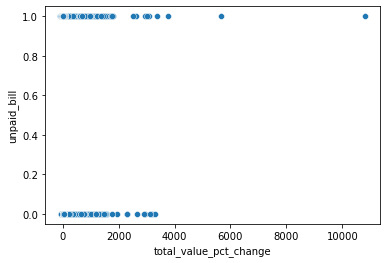

In [65]:
import seaborn as sns
sns.scatterplot(x='total_value_pct_change', y='unpaid_bill', data=merged_data)

In [74]:
merged_data['quartile'] = pd.qcut(merged_data['TotalVal'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5']) 

array_q = ['Q1', 'Q2', 'Q3', 'Q4','Q5']

# Loop through each quartile and run a logistic regression
for quartile in array_q:
    merged_data_quartile = merged_data[merged_data['quartile'] == quartile]
    Xx = merged_data_quartile['total_value_pct_change']
    Yy = merged_data_quartile['unpaid_bill']
    print(f'Coefficients for quartile {quartile}')
    logit = sm.Logit(Yy, Xx)
    result = logit.fit()
    print(result.summary())
    
    
    

/opt/anaconda3/envs/geppandas_stats/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Coefficients for quartile Q1
Optimization terminated successfully.
         Current function value: 0.675437
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            unpaid_bill   No. Observations:                20476
Model:                          Logit   Df Residuals:                    20475
Method:                           MLE   Df Model:                            0
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                -0.03697
Time:                        00:11:59   Log-Likelihood:                -13830.
converged:                       True   LL-Null:                       -13337.
Covariance Type:            nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
total_value_pct_change    -0.0105      0.000    -24.361

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

# Fit the logistic regression model
# model = logit('unpaid_bill ~ total_value_pct_change', data=merged_data)
# result = model.fit()

# Create a scatter plot of the residuals vs predicted values
predictions = result.predict(merged_data[['total_value_pct_change','unpaid_bill']])
residuals = merged_data['unpaid_bill'] - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Create a histogram of the residuals
sns.histplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot of the residuals
import scipy.stats as stats
res = result.resid_pearson 
stats.probplot(res, dist="norm", plot=plt)
plt.show()


ValueError: shapes (81885,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)